In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip  "/content/drive/MyDrive/chest_xray.zip"

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: ches

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
train_directory='/content/chest_xray/train'
val_directory='/content/chest_xray/test'
test_directory='/content/chest_xray/test'
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
#  ResNet from keras applications with imagenet weights for transfer learning
 from keras.applications import resnet
ResNet = resnet.ResNet101
convlayer=ResNet(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

171458560/171446536 [==============================] - 2s 0us/step


In [ ]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5)) #avoid overfitting
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              205522944 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                        

In [ ]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#model training
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
21/21 [==============================] - 129s 4s/step - loss: 1.1911 - accuracy: 0.8419 - val_loss: 2.6400 - val_accuracy: 0.6538
Epoch 2/5
21/21 [==============================] - 82s 4s/step - loss: 0.1809 - accuracy: 0.9432 - val_loss: 1.2847 - val_accuracy: 0.7212
Epoch 3/5
21/21 [==============================] - 82s 4s/step - loss: 0.1558 - accuracy: 0.9474 - val_loss: 1.3816 - val_accuracy: 0.6683
Epoch 4/5
21/21 [==============================] - 83s 4s/step - loss: 0.1369 - accuracy: 0.9482 - val_loss: 1.1767 - val_accuracy: 0.6683
Epoch 5/5
21/21 [==============================] - 83s 4s/step - loss: 0.1261 - accuracy: 0.9557 - val_loss: 0.7878 - val_accuracy: 0.7163


In [ ]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data=val_generator,
         epochs=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


21/21 [==============================] - 96s 4s/step - loss: 0.1148 - accuracy: 0.9589 - val_loss: 0.9412 - val_accuracy: 0.6923


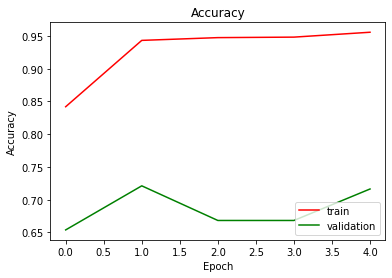

In [ ]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

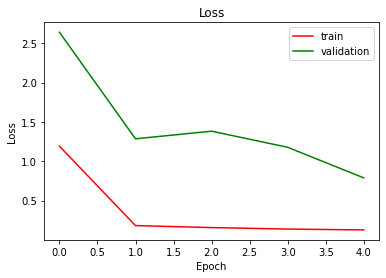

In [ ]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
model.evaluate(test_gemerator)

3/3 [==============================] - 9s 2s/step - loss: 0.9412 - accuracy: 0.6923


[0.9411575198173523, 0.692307710647583]

In [ ]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    probability=np.argmax(answer,axis=1)
    #print ('Bird Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances of correct classification')

[1]  % chances of correct classification


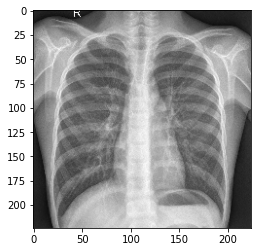

In [ ]:
img='/content/chest_xray/test/NORMAL/IM-0007-0001.jpeg'
pic=load_img('/content/chest_xray/test/NORMAL/IM-0007-0001.jpeg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

[1]  % chances of correct classification


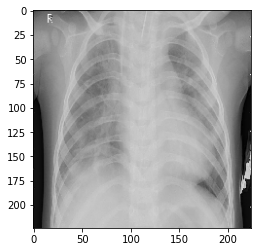

In [ ]:
img='/content/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg'
pic=load_img('/content/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg',target_size=(224,224,3))
plt.imshow(pic)
output(img)